<a href="https://colab.research.google.com/github/Vinoth1512/ML-ASSIGNMENTS/blob/main/ASSIGNMENT_5(DT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data=pd.read_csv("loan-train.csv")
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df=data.drop(['Loan_ID','Gender','Married','Dependents','Self_Employed',],axis=1)
df.head()


,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Graduate,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Education']=le.fit_transform(df.Education)
df['Property_Area']=le.fit_transform(df.Property_Area)
df['Loan_Status']=le.fit_transform(df.Loan_Status)
df.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,5849,0.0,NaN,360.0,1.0,2,1
1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,3000,0.0,66.0,360.0,1.0,2,1
3,1,2583,2358.0,120.0,360.0,1.0,2,1
4,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
final=df.replace(np.NaN,{"LoanAmount":100,"Loan_Amount_Term":360,"Credit_History":1.0})
final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          614 non-null    int64  
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Property_Area      614 non-null    int64  
 7   Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 38.5 KB


In [ ]:
x=final.iloc[:,:-1].values
y=final.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=5)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=5)

In [ ]:
ypred=model.predict(xtest)

In [ ]:
ytest

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
ypred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import *
confusion_matrix(ypred,ytest)

array([[29, 15],
       [14, 65]])

In [ ]:
accuracy_score(ytest,ypred)

0.7642276422764228

[Text(107.94432106598985, 211.4, 'X[5] <= 0.5\ngini = 0.423\nsamples = 491\nvalue = [149, 342]'),
 Text(28.891370558375634, 199.32, 'X[3] <= 547.5\ngini = 0.161\nsamples = 68\nvalue = [62, 6]'),
 Text(25.492385786802032, 187.24, 'X[2] <= 6981.5\ngini = 0.138\nsamples = 67\nvalue = [62, 5]'),
 Text(16.99492385786802, 175.16, 'X[1] <= 4316.5\ngini = 0.116\nsamples = 65\nvalue = [61, 4]'),
 Text(10.196954314720813, 163.07999999999998, 'X[4] <= 240.0\ngini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(6.797969543147208, 151.0, 'X[1] <= 2546.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(3.398984771573604, 138.92000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(10.196954314720813, 138.92000000000002, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(13.595939086294416, 151.0, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(23.792893401015228, 163.07999999999998, 'X[1] <= 4934.0\ngini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(20.393908629441626, 151.0, 'X[1] 

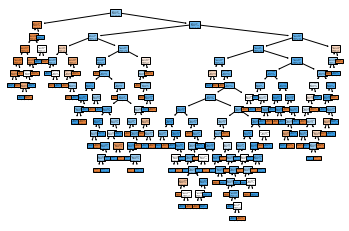

In [ ]:
from sklearn import tree
tree.plot_tree(model,fil)


In [ ]:
text_representation=tree.export_text(model)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- feature_3 <= 547.50
|   |   |--- feature_2 <= 6981.50
|   |   |   |--- feature_1 <= 4316.50
|   |   |   |   |--- feature_4 <= 240.00
|   |   |   |   |   |--- feature_1 <= 2546.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  2546.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  240.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  4316.50
|   |   |   |   |--- feature_1 <= 4934.00
|   |   |   |   |   |--- feature_1 <= 4836.00
|   |   |   |   |   |   |--- feature_1 <= 4366.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  4366.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  4836.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  4934.00
|   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  6981.50
|   |   |   |--- feature_1 <= 3826.50
|   |   |   |   |--- class: 1
|   |   |   |--- fea